# **Data Science Assignment**



---



**Scenario:**
You have been hired to consult for a winery in Portugal. They produce varieties of their traditional "Vinho Verde" and would like to understand what really determines their quality, so they can optimise their production

**Task:**
Your task is to create one or more models to predict quality given all other variables



---



## **Task 1**
**Explore each of the two datasets.** Do this by performing aggregations, computing summary statistics (using pandas), and plotting (with e.g. seaborn or matplotlib Pyplot) the data.

To achieve this firstly I need to aggregate my data and compute summary statistics in order to have a better view of the data. 

Importing the libraries that I am going to use for the entire notebook

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
data_red = pd.read_csv('/content/winequality-red.csv',sep=';')
data_white = pd.read_csv('/content/winequality-white.csv',sep=';')

dfr = pd.DataFrame(data_red)
dfw = pd.DataFrame(data_white)

Data aggregation for **Red wine**

In [ ]:
print("Red Wine")

dfr


Red Wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Data aggregation for **White wine**

In [ ]:
print("White Wine")

dfw

White Wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Now that I have aggregated my data I will compute summary statistics for red wine and for the white wine respectively.

In [ ]:
print("Red Wine")
dfr.describe()


Red Wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
print("White Wine")
dfw.describe()

White Wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Now that I have prepared my data it is time to implement the first task of the assignment.

**Task 1.A**
(Describe the distribution of wine quality across all samples, separately for red and white,
and compare the quality distributions between reds and whites. Create suitable plots to illustrate.)


Now I am going to describe the distribution of quality for the **red wine** with the appropriate plot.

Red Wine Distribution


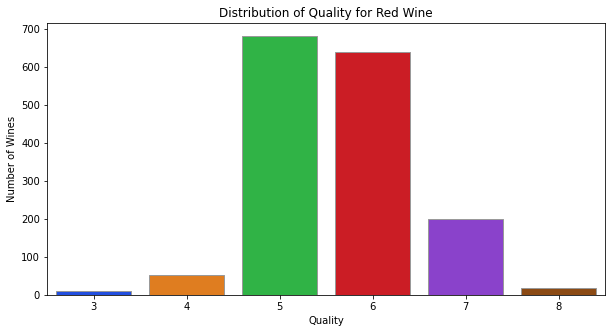

In [ ]:
print(f"Red Wine Distribution")
plt.figure(figsize = (10, 5))
sns.countplot(x = "quality", data = dfr, palette="bright", edgecolor=".6")
plt.title("Distribution of Quality for Red Wine")
plt.xlabel("Quality")
plt.ylabel("Number of Wines")
plt.show()
plt.close()

Now I am going to describe the distribution of quality for the **white wine** with the appropriate plot.

White Wine Distribution


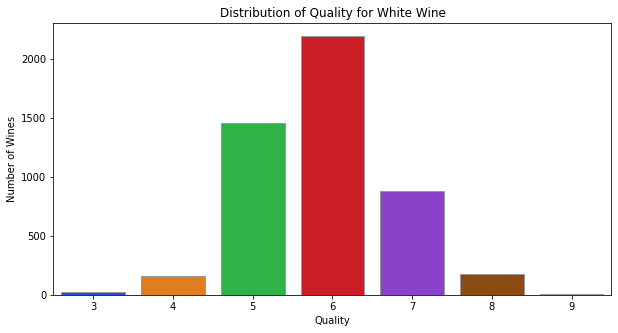

In [ ]:
print(f"White Wine Distribution")
plt.figure(figsize = (10, 5))
sns.countplot(x = "quality", data = dfw,palette = "bright", edgecolor=".6")
plt.title("Distribution of Quality for White Wine")
plt.xlabel("Quality")
plt.ylabel("Number of Wines")
plt.show()
plt.close()

And lastly I am going to illustrate the distribution of quality for **both wines** red and white with the appropriate plot.

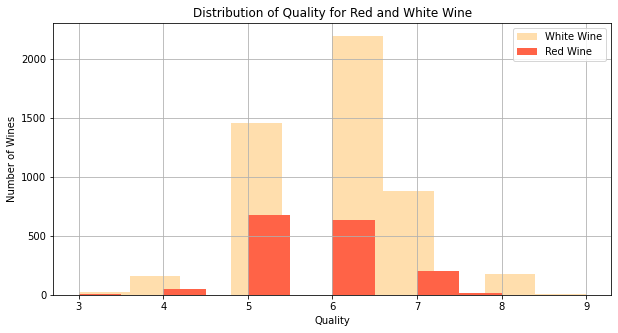

In [ ]:
plt.figure(figsize = (10, 5))
plt.title("Distribution of Quality for Red and White Wine")
plt.xlabel("Quality")  
plt.ylabel("Number of Wines")
dfw['quality'].hist(color='navajowhite', label="White Wine")
dfr['quality'].hist(color='tomato', label="Red Wine").legend()

**Task 1.B** (Discretise the alcohol content variables (separately for whites and reds) into low, mid, high based on its distribution. Create a 3-valued "alcohol_cat" variable to represent this.)

In [ ]:
print("Red Wine")

minr = 0
maxr = data_red["alcohol"].max()
meanr = data_red["alcohol"].mean()
stdr =  data_red["alcohol"].std()

dfr = pd.DataFrame(data_red)
dfr['alcohol_cat']=pd.cut(x=dfr['alcohol'], bins=[minr,(meanr-stdr),(meanr+stdr),maxr], 
                        labels=["low", "medium", "high"])

display(dfr)

Red Wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,medium
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,medium
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,medium
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,medium
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,medium


In [ ]:
print("White Wine")

minw = 0
maxw = data_white["alcohol"].max()
meanw = data_white["alcohol"].mean()
stdw =  data_white["alcohol"].std()

dfw = pd.DataFrame(data_white)
dfw['alcohol_cat']=pd.cut(x=dfw['alcohol'], bins=[minw,(meanw-stdw),(meanw+stdw),maxw], 
                        labels=["low", "medium", "high"])

display(dfw)

White Wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,low
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,medium
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,high


**Task 1.C** (Describe the distribution of wine quality as in (1.A), but separately for low-, mid-, and high-alcohol content. Create suitable plots to illustrate. Can you draw any conclusions on the relationship between alcohol content and quality?)

Red Wine



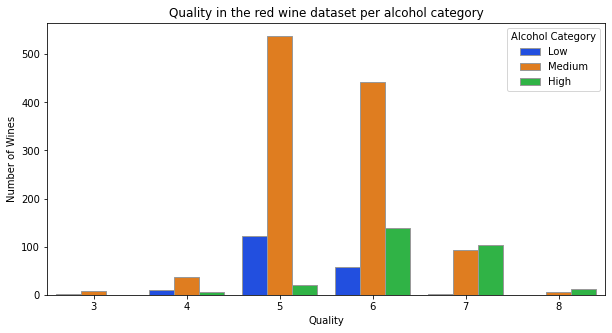

In [ ]:
print("Red Wine\n")

plt.figure(figsize = (10, 5))
sns.countplot(x='quality', hue = dfr['alcohol_cat'], data = data_red, palette="bright", edgecolor=".6")
plt.title("Quality in the red wine dataset per alcohol category")
plt.legend(labels=["Low","Medium", "High"], title = "Alcohol Category")
plt.xlabel("Quality")
plt.ylabel("Number of Wines")
plt.show()
plt.close()

White Wine



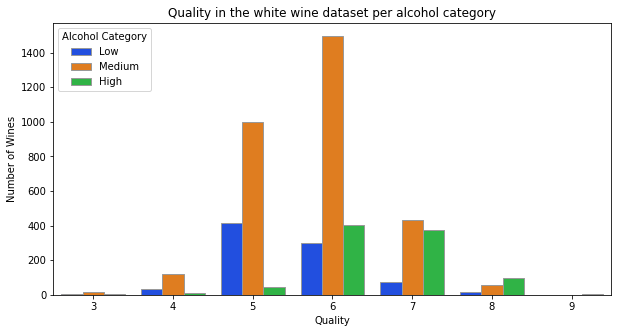

In [ ]:
print("White Wine\n")
plt.figure(figsize = (10, 5))
sns.countplot(x='quality', hue = dfw['alcohol_cat'], data = data_white, palette="bright", edgecolor=".6")
plt.title("Quality in the white wine dataset per alcohol category")
plt.legend(labels=["Low","Medium", "High"], title = "Alcohol Category")
plt.xlabel("Quality")
plt.ylabel("Number of Wines")
plt.show()
plt.close()

**Task 1.D** (Plot the residual sugar variable and identify a suitable threshold to separate "sweet" from "dry" wines*. Create a new "isSweet" binary variable to represent these two classes. The distributions of residual sugar are skewed for both reds and whites (in fact most wines in this dataset are dry according to the official definition, e.g., https://winefolly.com/deep-dive/sugar-in-wine-chart/) (Links to an external site.). A practical approach in this case is to pick a threshold that splits the dataset (almost) evenly, as that will give you two balanced classes for your classifier. So your task is to find a threshold such that each class has approximately the same number of records.)

**•** First I need to define min, max and median values from each wine and then to create the new isSweet column that I am going to use to illustrate the values.


In [ ]:
minr = dfr["residual sugar"].min()
maxr = dfr["residual sugar"].max()
medianr = dfr["residual sugar"].median()

dfr['isSweet']=pd.cut(x=dfr['residual sugar'], bins=[minr,medianr,maxr], 
                        labels=["dry", "sweet"])

minw = dfw["residual sugar"].min()
maxw = dfw["residual sugar"].max()
medianw = dfw["residual sugar"].median()

dfw['isSweet']=pd.cut(x=dfw['residual sugar'], bins=[minw,medianw,maxw], 
                        labels=["dry", "sweet"])

Now I am going to demonstrate the number of each category (dry/sweet) for the red wine.

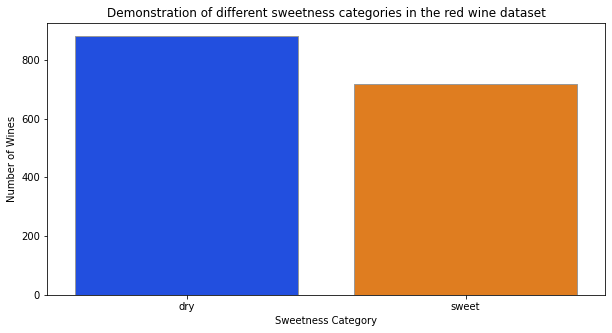

────────────────────────────────────────────────────────────────────────────────


count     1597
unique       2
top        dry
freq       881
Name: isSweet, dtype: object

────────────────────────────────────────────────────────────────────────────────


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,isSweet
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,medium,dry
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,medium,sweet
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,medium,sweet
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,dry
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,medium,dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,medium,dry
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium,dry
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium,sweet
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,medium,dry


In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(x = dfr['isSweet'], data = data_red, palette="bright", edgecolor=".6")
plt.title("Demonstration of different sweetness categories in the red wine dataset")
plt.xlabel("Sweetness Category")
plt.ylabel("Number of Wines")
plt.show()
plt.close()
print('─' * 80)
display(dfr["isSweet"].describe())
print('─' * 80)
display(dfr)

Now I am going to demonstrate the number of each category (dry,sweet) for the white wine.

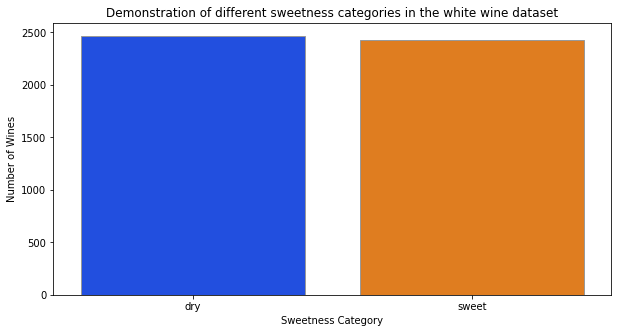

────────────────────────────────────────────────────────────────────────────────


count     4896
unique       2
top        dry
freq      2467
Name: isSweet, dtype: object

────────────────────────────────────────────────────────────────────────────────


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,isSweet
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,low,sweet
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium,dry
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium,sweet
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,sweet
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,sweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,dry
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,medium,sweet
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,dry
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,high,dry


In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(x = dfw['isSweet'], data = data_white, palette="bright", edgecolor=".6")
plt.title("Demonstration of different sweetness categories in the white wine dataset")
plt.xlabel("Sweetness Category")
plt.ylabel("Number of Wines")
plt.show()
plt.close()

print('─' * 80)
display(dfw["isSweet"].describe())
print('─' * 80)
display(dfw)

**Task 1.E** (Using the threshold from (1.D), repeat the distribution analysis of quality vs isSweet. Are sweet wines perceived as lower or higher quality than dry wines?)

Red Wine
────────────────────────────────────────────────────────────────────────────────


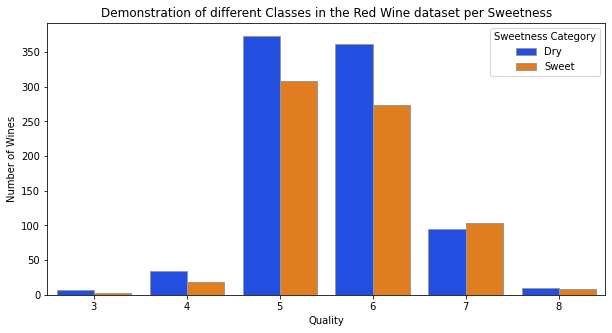

In [ ]:
print("Red Wine")
print('─' * 80)
plt.figure(figsize = (10, 5))
sns.countplot(x='quality', hue = dfr['isSweet'], data = data_red, palette="bright", edgecolor=".6")
plt.title("Demonstration of different Classes in the Red Wine dataset per Sweetness")
plt.xlabel("Quality")
plt.ylabel("Number of Wines")
plt.legend(labels=["Dry","Sweet"], title = "Sweetness Category")
plt.show()
plt.close()

White Wine
────────────────────────────────────────────────────────────────────────────────


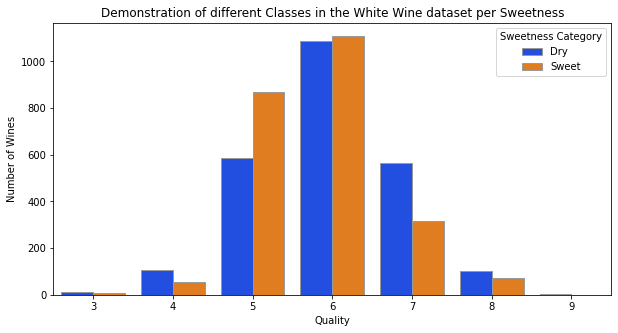

In [ ]:

print("White Wine")
print('─' * 80)

plt.figure(figsize = (10, 5))
sns.countplot(x='quality', hue = dfw['isSweet'], data = data_white, palette="bright", edgecolor=".6")
plt.title("Demonstration of different Classes in the White Wine dataset per Sweetness")
plt.xlabel("Quality")
plt.ylabel("Number of Wines")
plt.legend(labels=["Dry","Sweet"], title = "Sweetness Category")
plt.show()
plt.close()


## **Task 2** 
**Try and determine which subset of your variables can be most useful for learning.** This is in preparation to applying machine learning to create your model. To do this, analyse correlations between:
*   Each pair of variables
*   Each variable and the outcome (quality)
*   Produce a visual representation of the Correlation Matrix, using either seaborn or matplotlib. Comment on how some of the variables may relate to others. For this task, you may use Pandas methods to automatically create correlation matrices, for example pandas.DataFrame.corr(). Take care when using the correct metrics, i.e. you must choose between {‘pearson’, ‘kendall’, ‘spearman’}. Consult the documentation to learn about these metrics.

Red wine correlations
────────────────────────────────────────────────────────────────────────────────


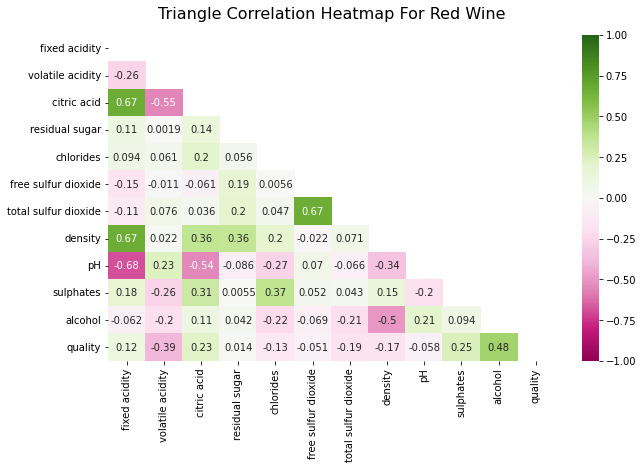

In [ ]:
print("Red wine correlations")
print('─' * 80)
plt.figure(figsize=(10, 6))

mask = np.triu(np.ones_like(data_red.corr(method='pearson', min_periods=1), dtype=bool))

correlationr = sns.heatmap(data_red.corr(method='pearson', min_periods=1), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PiYG')
correlationr.set_title('Triangle Correlation Heatmap For Red Wine', fontdict={'fontsize':16}, pad=16);

display(correlationr)

White wine correlations
────────────────────────────────────────────────────────────────────────────────


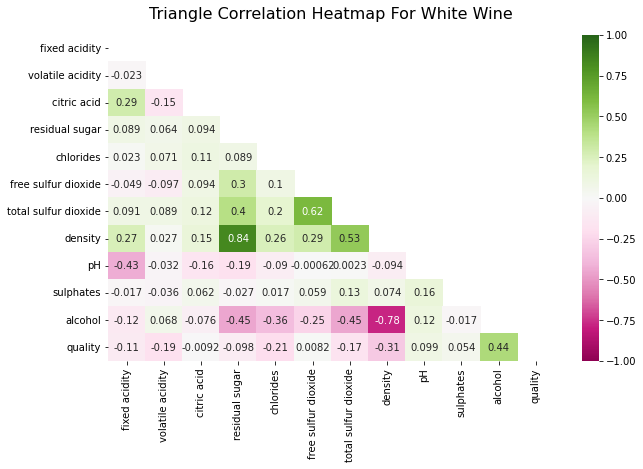

In [ ]:
print("White wine correlations")
print('─' * 80)
plt.figure(figsize=(10, 6))

mask = np.triu(np.ones_like(data_white.corr(method='pearson', min_periods=1), dtype=bool))

correlationw = sns.heatmap(data_white.corr(method='pearson', min_periods=1), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PiYG')
correlationw.set_title('Triangle Correlation Heatmap For White Wine', fontdict={'fontsize':16}, pad=16);

display(correlationw)

## **Task 3**
**Experiment with one or more machine learning approaches.** 
This creates a predictive model for quality. Some options are:
* Consider this as a classification problem. You can do this by considering the quality labels, ie. '5', '6', ... '9' and reducing the number of possible labels to two (binary classification). You should experiment with different thresholds and compare results, for instance define "low" to be quality <6, "high" >=6, then change the threshold to 5 or 7, etc. 
* Consider this a regression problem, where quality is now a continuous variable.

Preparation of Both Wine Datasets Before Implemnting ML Models

Producing a Quality Category with Two Different Categories: 
*   Low quality
*   High quality 

I am going to consider this as a classification problem

### **Red Wine data preparation for ML Models**

Creating quality category

In [ ]:
print("Red Wine")
print('─' * 80)
minr = 0
maxr = 10
cutoffr = 5

dfr['quality_cat']=pd.cut(x=dfr['quality'], bins=[minr,cutoffr,maxr], 
                        labels=["low quality", "high quality"])

display(dfr)


Red Wine
────────────────────────────────────────────────────────────────────────────────


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,isSweet,quality_cat
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,medium,dry,low quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,medium,sweet,low quality
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,medium,sweet,low quality
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,dry,high quality
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,medium,dry,low quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,medium,dry,low quality
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium,dry,high quality
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium,sweet,high quality
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,medium,dry,low quality


Transforming Categorical Data Into Numerical Data Using One-Hot Encoding and Numerics

This is the **Red Wine** Dataframe before transforming categorical data into numerical.

In [ ]:
display(dfr)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,isSweet,quality_cat
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,medium,dry,low quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,medium,sweet,low quality
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,medium,sweet,low quality
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,dry,high quality
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,medium,dry,low quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,medium,dry,low quality
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium,dry,high quality
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium,sweet,high quality
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,medium,dry,low quality


Now transforming the **quality category** into numerical data.

In [ ]:
dummies = pd.get_dummies(dfr["quality_cat"])
dfr = pd.concat((dfr, dummies), axis = 1)
dfr = dfr.drop("quality_cat", axis = 1)
display(dfr)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,isSweet,low quality,high quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,medium,dry,1,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,medium,sweet,1,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,medium,sweet,1,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,dry,0,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,medium,dry,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,medium,dry,1,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium,dry,0,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium,sweet,0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,medium,dry,1,0


And now transforming the **isSweet** category into numerical data.

In [ ]:
dummies = pd.get_dummies(dfr['isSweet'])
dfr = pd.concat((dfr, dummies), axis = 1)
dfr = dfr.drop('isSweet', axis = 1)
display(dfr)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,low quality,high quality,dry,sweet
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,medium,1,0,1,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,medium,1,0,0,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,medium,1,0,0,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,0,1,1,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,medium,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,medium,1,0,1,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium,0,1,1,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium,0,1,0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,medium,1,0,1,0


Next I am going to transform the three categories from alcohol_cat column which are low,medium and high into numbers in order to be able to use this column to my ML model later on. 

It will be: `{'low': 0, 'medium': 1, 'high': 2}`.

In [ ]:
class_numeric = {'low': 0, 'medium': 1, 'high': 2}

numeric_class_datasetr = dfr.replace({'alcohol_cat': class_numeric})

dfr = dfr.drop('alcohol_cat', axis = 1)
dfr = pd.concat((dfr, numeric_class_datasetr['alcohol_cat']), axis = 1)

display(dfr)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,low quality,high quality,dry,sweet,alcohol_cat
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0,1,0,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,0,0,1,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,0,0,1,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,1,1,0,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1,0,1,0,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0,1,1,0,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0,1,0,1,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1,0,1,0,1


Now is time to split the dataset in order to create a **training set** and a **test set** for my model

In [ ]:
datar = dfr.drop('high quality', axis=1)
datar = datar.drop('low quality', axis=1)
datar = datar.drop('quality', axis=1)

labelsr = dfr['high quality']

random_state = 10

data_train_r, data_test_r, labels_train_r,  labels_test_r = train_test_split(datar, 
                                                                     labelsr,
                                                                     train_size = 0.8,
                                                                     random_state = random_state)

In order to create a balanced dataset now I am going to add data to existing data. In other words I am **oversampleing** the dataset of the red wine

In [ ]:
smote = SMOTE(random_state = 10)
data_train_r, labels_train_r = smote.fit_resample(data_train_r, labels_train_r)

unique, counts = np.unique(labels_train_r, return_counts=True)

print('─' * 80)
print(counts, unique)
print('─' * 80)

────────────────────────────────────────────────────────────────────────────────
[678 678] [0 1]
────────────────────────────────────────────────────────────────────────────────


**Scalling** the data

In [ ]:
scaler = StandardScaler()
scaler.fit(data_train_r)

data_train_scaled_r = scaler.transform(data_train_r)
data_test_scaled_r = scaler.transform(data_test_r)

print('─' * 80)

display(data_train_scaled_r.shape)
display(data_test_scaled_r.shape)

print('─' * 80)

────────────────────────────────────────────────────────────────────────────────


(1356, 14)

(320, 14)

────────────────────────────────────────────────────────────────────────────────


Now I am going to create the models

**Logistic Regression Method**

In [ ]:
penalty = 'l2'
C = 1
solver = 'lbfgs'
multi_class = 'ovr'

logistic_regression_r = LogisticRegression(penalty = penalty,
                                         C = C,
                                         solver = solver,
                                         multi_class = multi_class)

logistic_regression_r.fit(data_train_scaled_r, labels_train_r)

logistic_regression_label_predictions_r = logistic_regression_r.predict(data_train_scaled_r)
train_acc_r = accuracy_score(labels_train_r, logistic_regression_label_predictions_r)

logistic_regression_label_predictions_r = logistic_regression_r.predict(data_test_scaled_r)
test_acc_r = accuracy_score(labels_test_r, logistic_regression_label_predictions_r)

print()
print('─' * 80)
print()

print(f"Logistic regression train accuracy: {train_acc_r * 100}%")
print(f"Logistic regression test accuracy: {test_acc_r * 100}%")

print()
print('─' * 80)
print()



────────────────────────────────────────────────────────────────────────────────

Logistic regression train accuracy: 75.73746312684366%
Logistic regression test accuracy: 75.0%

────────────────────────────────────────────────────────────────────────────────



**Decision Tree Method**

In [ ]:
decision_tree_r = tree.DecisionTreeClassifier()
decision_tree_r.fit(data_train_scaled_r, labels_train_r)

decision_tree_predictions_r = decision_tree_r.predict(data_train_scaled_r)
train_acc_r = accuracy_score(labels_train_r, decision_tree_predictions_r)

decision_tree_predictions_r = decision_tree_r.predict(data_test_scaled_r)
test_acc_r = accuracy_score(labels_test_r, decision_tree_predictions_r)

print()
print('─' * 80)
print()

print(f"Decision tree train accuracy: {train_acc_r * 100}%")
print(f"Decision tree test accuracy: {test_acc_r * 100}%")


print()
print('─' * 80)
print()



────────────────────────────────────────────────────────────────────────────────

Decision tree train accuracy: 100.0%
Decision tree test accuracy: 75.0%

────────────────────────────────────────────────────────────────────────────────



**Random Forest Method**

In [ ]:
random_forest_r = RandomForestClassifier(n_estimators=50, max_depth=50, random_state=10)
random_forest_r.fit(data_train_scaled_r, labels_train_r)

random_forest_predictions_r = random_forest_r.predict(data_train_scaled_r)
train_acc_f_r = accuracy_score(labels_train_r, random_forest_predictions_r)

random_forest_predictions_r = random_forest_r.predict(data_test_scaled_r)
test_acc_f_r = accuracy_score(labels_test_r, random_forest_predictions_r)

print()
print('─' * 80)
print()

print(f"Random forest train accuracy: {train_acc_f_r * 100}%")
print(f"Random forest test accuracy: {test_acc_f_r * 100}%")

print()
print('─' * 80)
print()


────────────────────────────────────────────────────────────────────────────────

Random forest train accuracy: 100.0%
Random forest test accuracy: 80.625%

────────────────────────────────────────────────────────────────────────────────



### **White Wine data preparation for ML Models**

Creating quality category

In [ ]:
print("White Wine")
print('─' * 80)
minw = 0
maxw = 10
cutoffw = 5

dfw['quality_cat']=pd.cut(x=dfw['quality'], bins=[minw,cutoffw,maxw], 
                        labels=["low quality", "high quality"])

display(dfw)

White Wine
────────────────────────────────────────────────────────────────────────────────


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,isSweet,quality_cat
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,low,sweet,high quality
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium,dry,high quality
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium,sweet,high quality
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,sweet,high quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,sweet,high quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,dry,high quality
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,medium,sweet,low quality
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,dry,high quality
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,high,dry,high quality


Transforming Categorical Data Into Numerical Data Using One-Hot Encoding and Numerics

Now transforming the quality category into numerical data.

This is the **White Wine** Dataframe before transforming categorical data into numerical.

In [ ]:
display(dfw)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,isSweet,quality_cat
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,low,sweet,high quality
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium,dry,high quality
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium,sweet,high quality
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,sweet,high quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,sweet,high quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,dry,high quality
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,medium,sweet,low quality
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,dry,high quality
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,high,dry,high quality


Now transforming the **quality category** into numerical data.

In [ ]:
dummies = pd.get_dummies(dfw["quality_cat"])
dfw = pd.concat((dfw, dummies), axis = 1)
dfw = dfw.drop("quality_cat", axis = 1)
display(dfw)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,isSweet,low quality,high quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,low,sweet,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium,dry,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium,sweet,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,sweet,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,sweet,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,dry,0,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,medium,sweet,1,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,dry,0,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,high,dry,0,1


And now transforming the **isSweet** category into numerical data.

In [ ]:
dummies = pd.get_dummies(dfw['isSweet'])
dfw = pd.concat((dfw, dummies), axis = 1) 
dfw = dfw.drop('isSweet', axis = 1)
display(dfw)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,low quality,high quality,dry,sweet
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,low,0,1,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium,0,1,1,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium,0,1,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,0,1,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,0,1,1,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,medium,1,0,0,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,0,1,1,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,high,0,1,1,0


Next I am going to transform the three categories from alcohol_cat column which are low,medium and high into numbers in order to be able to use this column to my ML model later on. 

It will be: `{'low': 0, 'medium': 1, 'high': 2}`.

In [ ]:
class_numeric = {'low': 0, 'medium': 1, 'high': 2}

numeric_class_datasetw = dfw.replace({'alcohol_cat': class_numeric})

dfw = dfw.drop('alcohol_cat', axis = 1)
dfw = pd.concat((dfw, numeric_class_datasetw['alcohol_cat']), axis = 1)

display(dfw)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,low quality,high quality,dry,sweet,alcohol_cat
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0,1,0,1,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0,1,1,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0,1,0,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,1,0,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,1,1,0,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,0,0,1,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1,1,0,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,1,1,0,2


Now is time to split the dataset in order to create a **training set** and a **test set** for my model

In [ ]:
dataw = dfw.drop('quality', axis=1)
dataw = dataw.drop('high quality', axis=1)
dataw = dataw.drop('low quality', axis=1)

labelsw = dfw['high quality']
random_state = 10

data_train_w, data_test_w, labels_train_w,  labels_test_w = train_test_split(dataw, labelsw,
                                                                     train_size = 0.8,
                                                                     random_state = random_state)

In order to create a balanced dataset, I am going to remove data from existing data this time. In other words I am **undersampleing** the dataset of the white wine

In [ ]:
print()
print('─' * 80)
print()

unique, counts = np.unique(labels_train_w, return_counts=True)
print(counts, unique)
print(f"Number of class examples equal? {all(counts == 1329)}")

print('Original dataset %s' % Counter(labels_train_w))
rus = RandomUnderSampler(random_state=10)
data_train_w, labels_train_w = rus.fit_resample(data_train_w, labels_train_w)
print('Resampled dataset %s' % Counter(labels_train_w))

unique, counts = np.unique(labels_train_w, return_counts=True)
print(counts, unique)
print(f"Number of class examples equal? {all(counts == 1329)}")
print()
print('─' * 80)
print()


────────────────────────────────────────────────────────────────────────────────

[1329 2589] [0 1]
Number of class examples equal? False
Original dataset Counter({1: 2589, 0: 1329})
Resampled dataset Counter({0: 1329, 1: 1329})
[1329 1329] [0 1]
Number of class examples equal? True

────────────────────────────────────────────────────────────────────────────────



**Scalling** the data

In [ ]:
print()
print('─' * 80)
print()
scaler = StandardScaler()
scaler.fit(data_train_w)

data_train_scaled_w = scaler.transform(data_train_w)
data_test_scaled_w = scaler.transform(data_test_w)

display(data_train_scaled_w.shape)
display(data_test_scaled_w.shape)
print()
print('─' * 80)
print()


────────────────────────────────────────────────────────────────────────────────



(2658, 14)

(980, 14)


────────────────────────────────────────────────────────────────────────────────



Now I am going to create the Models

**Logistic Regression Method**

In [ ]:
penalty = 'l2'
C = 1
solver = 'lbfgs'
multi_class = 'ovr'

logistic_regression_w = LogisticRegression(penalty = penalty,
                                         C = C,
                                         solver = solver,
                                         multi_class = multi_class)

logistic_regression_w.fit(data_train_scaled_w, labels_train_w)

logistic_regression_label_predictions_w = logistic_regression_w.predict(data_train_scaled_w)
train_acc_w = accuracy_score(labels_train_w, logistic_regression_label_predictions_w)

logistic_regression_label_predictions_w = logistic_regression_w.predict(data_test_scaled_w)
test_acc_w = accuracy_score(labels_test_w, logistic_regression_label_predictions_w)

print()
print('─' * 80)
print()

print(f"Logistic regression train accuracy: {train_acc_w * 100}%")
print(f"Logistic regression test accuracy: {test_acc_w * 100}%")

print()
print('─' * 80)
print()


────────────────────────────────────────────────────────────────────────────────

Logistic regression train accuracy: 73.47629796839729%
Logistic regression test accuracy: 72.0408163265306%

────────────────────────────────────────────────────────────────────────────────



**Decision Tree Method**

In [ ]:
decision_tree_w = tree.DecisionTreeClassifier()
decision_tree_w.fit(data_train_scaled_w, labels_train_w)

decision_tree_predictions_w = decision_tree_w.predict(data_train_scaled_w)
train_acc_t_w = accuracy_score(labels_train_w, decision_tree_predictions_w)

decision_tree_predictions_w = decision_tree_w.predict(data_test_scaled_w)
test_acc_t_w = accuracy_score(labels_test_w, decision_tree_predictions_w)
print()
print('─' * 80)
print()

print(f"Decision tree train accuracy: {train_acc_t_w * 100}%")
print(f"Decision tree test accuracy: {test_acc_t_w * 100}%")

print()
print('─' * 80)
print()


────────────────────────────────────────────────────────────────────────────────

Decision tree train accuracy: 100.0%
Decision tree test accuracy: 74.59183673469387%

────────────────────────────────────────────────────────────────────────────────



**Random Forest Method**

In [ ]:
random_forest_w = RandomForestClassifier(n_estimators=50, max_depth=50, random_state=10)
random_forest_w.fit(data_train_scaled_w, labels_train_w)

random_forest_predictions_w = random_forest_w.predict(data_train_scaled_w)
train_acc_f_w = accuracy_score(labels_train_w, random_forest_predictions_w)

random_forest_predictions_w = random_forest_w.predict(data_test_scaled_w)
test_acc_f_w = accuracy_score(labels_test_w, random_forest_predictions_w)

print()
print('─' * 80)
print()

print(f"Random forest train accuracy: {train_acc_f_w * 100}%")
print(f"Random forest test accuracy: {test_acc_f_w * 100}%")

print()
print('─' * 80)
print()


────────────────────────────────────────────────────────────────────────────────

Random forest train accuracy: 99.96237772761475%
Random forest test accuracy: 78.77551020408163%

────────────────────────────────────────────────────────────────────────────────



## **Task 4**

**Evaluate each model using k-fold cross validation.**

Report the model's performance on both the training set and test set, using appropriate metrics for the kind of model chosen. For example, a binary classifier can be evaluated using f1-score, ROC curves, AUC. A regression model is usually evaluated using MSE, RMSE and related "error" metrics.

### **Red Wine Evaluation using k-fold Validation**

**Logistic Regression**


────────────────────────────────────────────────────────────────────────────────

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       143
           1       0.80      0.73      0.76       177

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.76      0.75      0.75       320


────────────────────────────────────────────────────────────────────────────────



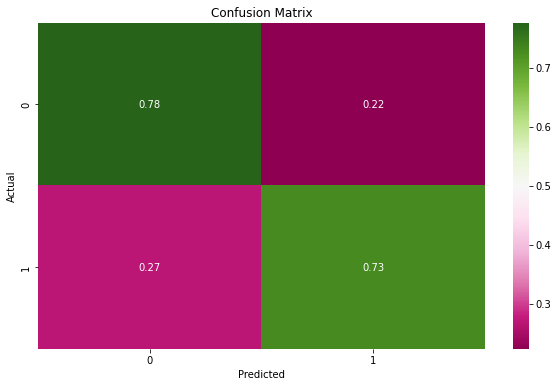


────────────────────────────────────────────────────────────────────────────────

Use of predict_proba


=== ROC ===
roc_auc_score = 0.75
auc = 0.82


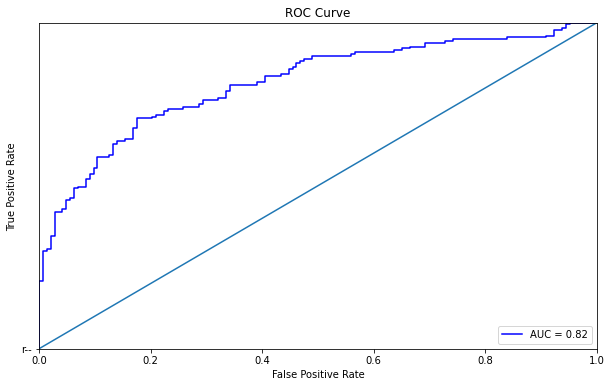


────────────────────────────────────────────────────────────────────────────────


In [ ]:
print()
print('─' * 80)
print()

# Classification Report
print(classification_report(labels_test_r, logistic_regression_label_predictions_r))

print()
print('─' * 80)
print()

# Confusion matrix
conf_matrix = confusion_matrix(labels_test_r, logistic_regression_label_predictions_r)

conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

labels = np.unique(labels_test_r)

plt.subplots(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels, cmap='PiYG')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print()
print('─' * 80)
print()

# ROC diagram
if hasattr(logistic_regression_r, "predict_function"):
  print("Use of predict_function")
  probs = logistic_regression_r.predict.predict_function(data_test_scaled_r)
  preds = probs
else: 
  print("Use of predict_proba")
  probs = logistic_regression_r.predict_proba(data_test_scaled_r)
  preds = probs[:,1]

fpr, tpr, threshold = roc_curve(labels_test_r, preds)
roc_auc = auc(fpr, tpr)

if logistic_regression_label_predictions_r is not None:
  print("\n\n=== ROC ===")
  print("roc_auc_score = %0.2f" % roc_auc_score(labels_test_r, logistic_regression_label_predictions_r))
  print("auc = %0.2f" % roc_auc)

plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], ['r--'])
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print()
print('─' * 80)


**Decision Tree**


────────────────────────────────────────────────────────────────────────────────

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       143
           1       0.78      0.76      0.77       177

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320


────────────────────────────────────────────────────────────────────────────────



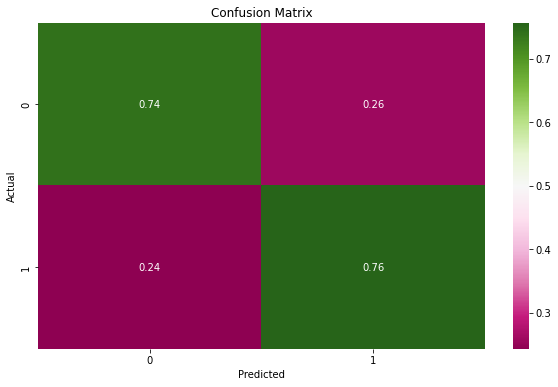


────────────────────────────────────────────────────────────────────────────────

Use of predict_proba


=== ROC ===
roc_auc_score = 0.75
auc = 0.75


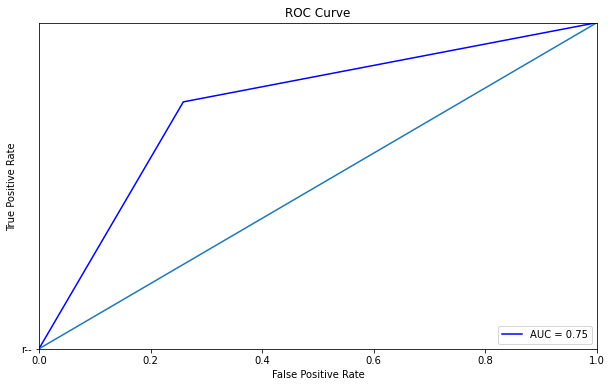


────────────────────────────────────────────────────────────────────────────────



In [ ]:
print()
print('─' * 80)
print()

# Classification report
print(classification_report(labels_test_r, decision_tree_predictions_r))
      
print()
print('─' * 80)
print()

# Confusion matrix
conf_matrix = confusion_matrix(labels_test_r, decision_tree_predictions_r)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels, cmap='PiYG')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print()
print('─' * 80)
print()

# ROC diagram
if hasattr(decision_tree_r, "decision_function"):
  print("Use of decision_function")
  probs = decision_tree_r.decision.decision_function(data_test_scaled_r)
  preds = probs
else: 
  print("Use of predict_proba")
  probs = decision_tree_r.predict_proba(data_test_scaled_r)
  preds = probs[:,1]

fpr, tpr, threshold = roc_curve(labels_test_r, preds)
roc_auc = auc(fpr, tpr)

if decision_tree_predictions_r is not None:
  print("\n\n=== ROC ===")
  print("roc_auc_score = %0.2f" % roc_auc_score(labels_test_r, decision_tree_predictions_r))
  print("auc = %0.2f" % roc_auc)

plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], ['r--'])
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print()
print('─' * 80)
print()

**Random Forest**


────────────────────────────────────────────────────────────────────────────────

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       143
           1       0.84      0.80      0.82       177

    accuracy                           0.81       320
   macro avg       0.80      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320


────────────────────────────────────────────────────────────────────────────────



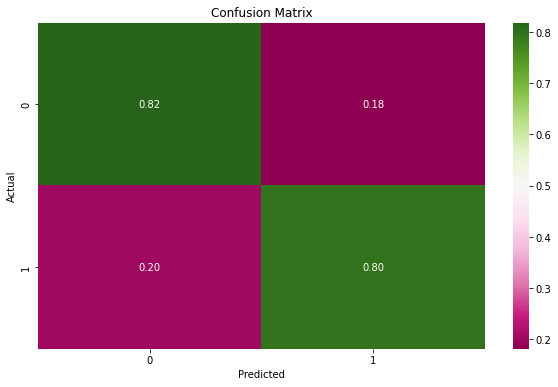


────────────────────────────────────────────────────────────────────────────────

Use of predict_proba

=== ROC ===
roc_auc_score = 0.81
auc = 0.90


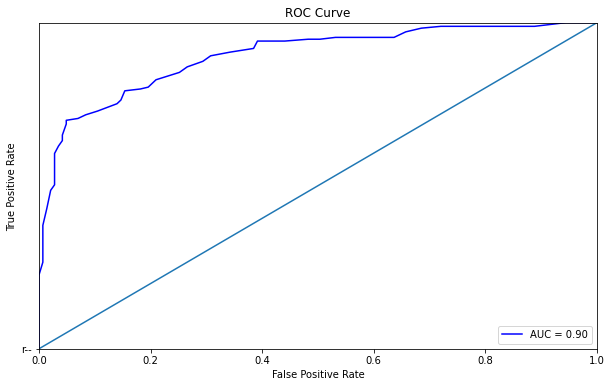


────────────────────────────────────────────────────────────────────────────────

Best parameters set found: {'max_depth': 10, 'n_estimators': 15}
Train accuracy: 95.64896755162242%
Test accuracy: 78.75%

────────────────────────────────────────────────────────────────────────────────


In [ ]:
print()
print('─' * 80)
print()

# Classification report
print(classification_report(labels_test_r, random_forest_predictions_r))

print()
print('─' * 80)
print()

# Confusion matrix
conf_matrix = confusion_matrix(labels_test_r, random_forest_predictions_r)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels, cmap='PiYG')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print()
print('─' * 80)
print()

# ROC diagram
if hasattr(random_forest_r, "predict_function"):
  print("Use of predict_function")
  probs = random_forest_r.predict.predict_function(data_test_scaled_r)
  preds = probs
else: 
  print("Use of predict_proba")
  probs = random_forest_r.predict_proba(data_test_scaled_r)
  preds = probs[:,1]

fpr, tpr, threshold = roc_curve(labels_test_r, preds)
roc_auc = auc(fpr, tpr)

if random_forest_predictions_r is not None:
  print("\n=== ROC ===")
  print("roc_auc_score = %0.2f" % roc_auc_score(labels_test_r, random_forest_predictions_r))
  print("auc = %0.2f" % roc_auc)

plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], ['r--'])
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print()
print('─' * 80)
print()

#Cross Validation
random_state = 10
number_of_folds = 5

parameters_to_tune = [{'n_estimators': [10,15],
                      'max_depth': [5,10]}]

search = GridSearchCV(RandomForestClassifier(random_state=random_state), parameters_to_tune, cv = number_of_folds)
search.fit(data_train_scaled_r, labels_train_r)

print(f"Best parameters set found: {search.best_params_}")

random_forest_r = RandomForestClassifier(n_estimators = search.best_params_['n_estimators'],
                                       max_depth = search.best_params_['max_depth'],
                                       random_state=10)
random_forest_r.fit(data_train_scaled_r, labels_train_r)

random_forest_predictions_r = random_forest_r.predict(data_train_scaled_r)
train_acc_f_r = accuracy_score(labels_train_r, random_forest_predictions_r)

random_forest_predictions_r = random_forest_r.predict(data_test_scaled_r)
test_acc_f_r = accuracy_score(labels_test_r, random_forest_predictions_r)

print(f"Train accuracy: {train_acc_f_r * 100}%")
print(f"Test accuracy: {test_acc_f_r * 100}%")

print()
print('─' * 80)


### **White Wine Evaluation using k-fold Validation**

**Logistic Regression**


────────────────────────────────────────────────────────────────────────────────

              precision    recall  f1-score   support

           0       0.54      0.74      0.63       311
           1       0.85      0.71      0.78       669

    accuracy                           0.72       980
   macro avg       0.70      0.72      0.70       980
weighted avg       0.76      0.72      0.73       980


────────────────────────────────────────────────────────────────────────────────



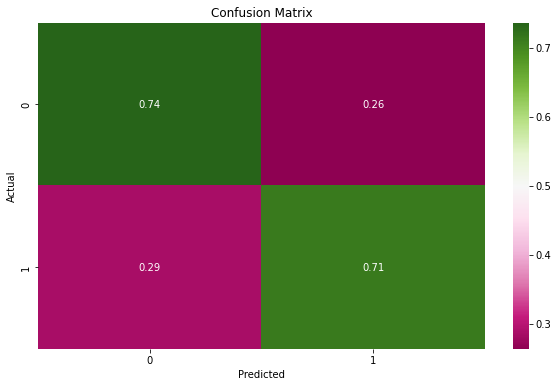


────────────────────────────────────────────────────────────────────────────────

Use of predict_proba


=== ROC ===
roc_auc_score = 0.72
auc = 0.80


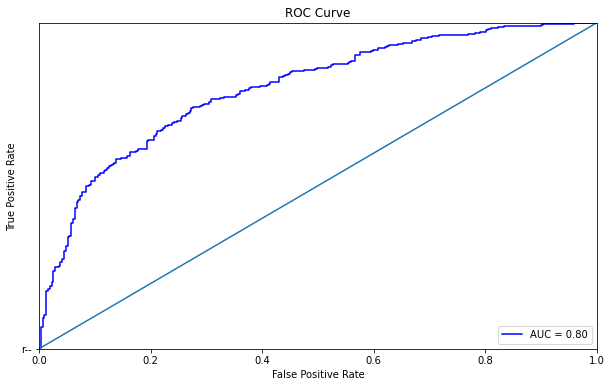


────────────────────────────────────────────────────────────────────────────────



In [ ]:
print()
print('─' * 80)
print()

# Classification Report
print(classification_report(labels_test_w, logistic_regression_label_predictions_w))

print()
print('─' * 80)
print()

# Confusion matrix
conf_matrix = confusion_matrix(labels_test_w, logistic_regression_label_predictions_w)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

labels = np.unique(labels_test_w)

plt.subplots(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels, cmap='PiYG')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print()
print('─' * 80)
print()

# ROC diagram
if hasattr(logistic_regression_w, "predict_function"):
  print("Use of predict_function")
  probs = logistic_regression_w.predict.predict_function(data_test_scaled_w)
  preds = probs
else: 
  print("Use of predict_proba")
  probs = logistic_regression_w.predict_proba(data_test_scaled_w)
  preds = probs[:,1]

fpr, tpr, threshold = roc_curve(labels_test_w, preds)
roc_auc = auc(fpr, tpr)

if logistic_regression_label_predictions_w is not None:
  print("\n\n=== ROC ===")
  print("roc_auc_score = %0.2f" % roc_auc_score(labels_test_w, logistic_regression_label_predictions_w))
  print("auc = %0.2f" % roc_auc)

plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], ['r--'])
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print()
print('─' * 80)
print()

# Cross Validation


**Decision Tree**


────────────────────────────────────────────────────────────────────────────────

              precision    recall  f1-score   support

           0       0.57      0.78      0.66       311
           1       0.88      0.73      0.80       669

    accuracy                           0.75       980
   macro avg       0.72      0.75      0.73       980
weighted avg       0.78      0.75      0.75       980


────────────────────────────────────────────────────────────────────────────────



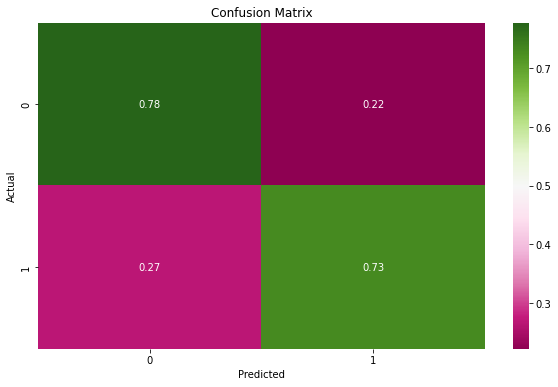


────────────────────────────────────────────────────────────────────────────────

Use of predict_proba


=== ROC ===
roc_auc_score = 0.75
auc = 0.75


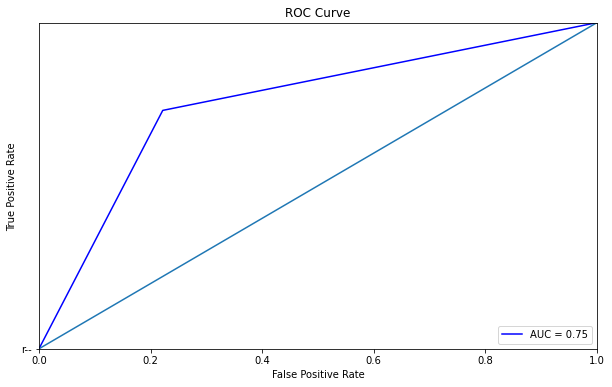


────────────────────────────────────────────────────────────────────────────────


In [ ]:
print()
print('─' * 80)
print()

# Classification report
print(classification_report(labels_test_w, decision_tree_predictions_w))
      
print()
print('─' * 80)
print()

# Confusion matrix
conf_matrix = confusion_matrix(labels_test_w, decision_tree_predictions_w)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels, cmap='PiYG')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print()
print('─' * 80)
print()

# ROC diagram
if hasattr(decision_tree_w, "decision_function"):
  print("Use of decision_function")
  probs = decision_tree_w.decision.decision_function(data_test_scaled_w)
  preds = probs
else: 
  print("Use of predict_proba")
  probs = decision_tree_w.predict_proba(data_test_scaled_w)
  preds = probs[:,1]

fpr, tpr, threshold = roc_curve(labels_test_w, preds)
roc_auc = auc(fpr, tpr)

if decision_tree_predictions_w is not None:
  print("\n\n=== ROC ===")
  print("roc_auc_score = %0.2f" % roc_auc_score(labels_test_w, decision_tree_predictions_w))
  print("auc = %0.2f" % roc_auc)

plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], ['r--'])
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print()
print('─' * 80)


**Random Forest** 


────────────────────────────────────────────────────────────────────────────────

              precision    recall  f1-score   support

           0       0.62      0.84      0.72       311
           1       0.91      0.76      0.83       669

    accuracy                           0.79       980
   macro avg       0.77      0.80      0.77       980
weighted avg       0.82      0.79      0.79       980


────────────────────────────────────────────────────────────────────────────────



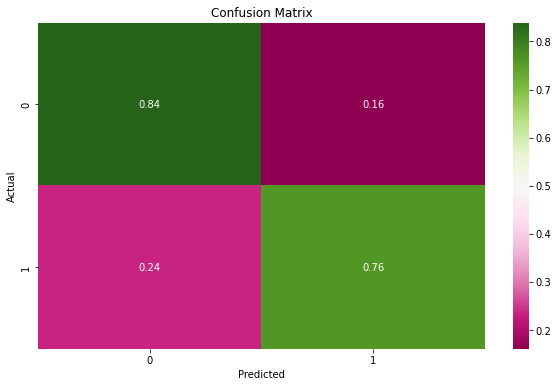


────────────────────────────────────────────────────────────────────────────────

Use of predict_proba


=== ROC ===
roc_auc_score = 0.80
auc = 0.89


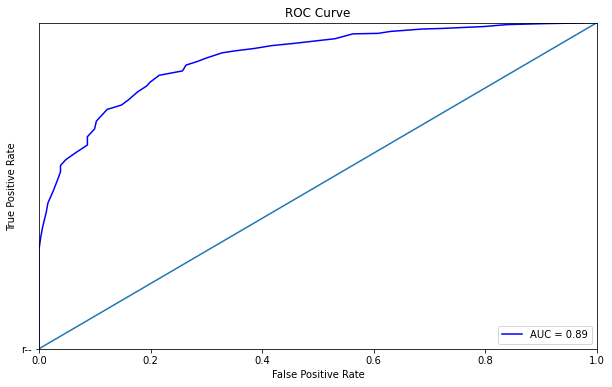


────────────────────────────────────────────────────────────────────────────────

Best parameters set found: {'max_depth': 10, 'n_estimators': 15}
Train accuracy: 92.09932279909707%
Test accuracy: 77.75510204081633%

────────────────────────────────────────────────────────────────────────────────



In [ ]:
print()
print('─' * 80)
print()
# Classification report
print(classification_report(labels_test_w, random_forest_predictions_w))

print()
print('─' * 80)
print()

# Confusion matrix
conf_matrix = confusion_matrix(labels_test_w, random_forest_predictions_w)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels, cmap='PiYG')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print()
print('─' * 80)
print()

# ROC diagram
if hasattr(random_forest_w, "predict_function"):
  print("Use of predict_function")
  probs = random_forest_w.predict.predict_function(data_test_scaled_w)
  preds = probs
else: 
  print("Use of predict_proba")
  probs = random_forest_w.predict_proba(data_test_scaled_w)
  preds = probs[:,1]

fpr, tpr, threshold = roc_curve(labels_test_w, preds)
roc_auc = auc(fpr, tpr)

if random_forest_predictions_w is not None:
  print("\n\n=== ROC ===")
  print("roc_auc_score = %0.2f" % roc_auc_score(labels_test_w, random_forest_predictions_w))
  print("auc = %0.2f" % roc_auc)

plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], ['r--'])
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print()
print('─' * 80)
print()

# Cross Validation
random_state = 10
number_of_folds = 5

parameters_to_tune = [{'n_estimators': [10,15],
                      'max_depth': [5,10]}]

search = GridSearchCV(RandomForestClassifier(random_state=random_state), parameters_to_tune, cv = number_of_folds)
search.fit(data_train_scaled_w, labels_train_w)

print(f"Best parameters set found: {search.best_params_}")

random_forest_w = RandomForestClassifier(n_estimators = search.best_params_['n_estimators'],
                                       max_depth = search.best_params_['max_depth'],
                                       random_state=10)
random_forest_w.fit(data_train_scaled_w, labels_train_w)

random_forest_predictions_w = random_forest_w.predict(data_train_scaled_w)
train_acc_f_w = accuracy_score(labels_train_w, random_forest_predictions_w)

random_forest_predictions_w = random_forest_w.predict(data_test_scaled_w)
test_acc_f_w = accuracy_score(labels_test_w, random_forest_predictions_w)

print(f"Train accuracy: {train_acc_f_w * 100}%")
print(f"Test accuracy: {test_acc_f_w * 100}%")

print()
print('─' * 80)
print()

And this is the **end** of the assignment.